# Vehicle Routing Problem Solution using Simulated Annealing

## Introduction

The Vehicle Routing Problem (VRP) is a complex combinatorial optimization challenge that involves finding optimal routes for a fleet of vehicles to serve a set of customers, while respecting various constraints. In this project, we tackle the Capacitated Vehicle Routing Problem (CVRP), where each vehicle has a limited capacity and each customer has a specific demand that must be fulfilled.

This document outlines our approach to solving the CVRP using Simulated Annealing (SA), a powerful metaheuristic optimization technique. We present the problem formulation, solution methodology, implementation details, and results analysis.

## Problem Definition

The Capacitated Vehicle Routing Problem can be defined as follows:

- A fleet of vehicles with known capacities is stationed at a central depot
- A set of customers with known locations and demands must be served
- Each customer must be visited exactly once by exactly one vehicle
- Each vehicle starts and ends its route at the depot
- The total demand on any route cannot exceed the capacity of the assigned vehicle
- The objective is to minimize the total distance traveled by all vehicles

The CVRP is NP-hard, meaning that finding optimal solutions for large problem instances is computationally intractable. This complexity justifies our choice of a metaheuristic approach.

## Methodology

### Simulated Annealing

Simulated Annealing for this problem:

1. **Ability to escape local optima**: The probabilistic acceptance of worse solutions allows SA to navigate complex solution landscapes and avoid getting trapped in local minima
2. **Implementation simplicity**: Compared to other metaheuristics, SA offers an excellent balance between implementation complexity and solution quality
3. **Flexible neighborhood structure**: We can easily incorporate multiple types of neighborhood moves to explore the solution space effectively
4. **Controlled convergence**: The temperature schedule provides a natural transition from exploration to exploitation

### Solution Representation

Our solution is represented as a list of routes, where each route is a list of customer nodes:
```
Example: [[1, 3, 5], [2, 4], [6, 7, 8], [9, 10]] represents 4 routes
```

This representation allows for:
- Intuitive understanding of the solution structure
- Easy calculation of route distances and demands
- Efficient implementation of neighborhood operators

### Neighborhood Operators

We implemented three neighborhood operators to generate diverse solution candidates:

1. **Swap**: Exchange two customers between different or same routes
2. **Relocate**: Move a customer from one route to another
3. **Two-opt**: Reverse a segment within a route to improve its structure

These operators were chosen to provide a balanced exploration of the solution space, allowing both minor adjustments and significant restructuring of routes.

### Algorithm Implementation

Our implementation follows the standard Simulated Annealing framework:

1. **Initialization**:
   - Generate an initial feasible solution using a greedy approach
   - Set initial temperature and cooling parameters

2. **Main Loop**:
   - At each iteration, generate a neighbor solution using one of the neighborhood operators
   - Check if the neighbor solution is feasible (respects capacity constraints)
   - Calculate the acceptance probability based on the solution quality difference and current temperature
   - Accept or reject the neighbor solution according to the probability
   - Update the best solution found if applicable
   - Decrease the temperature according to the cooling schedule

3. **Termination**:
   - Stop when the temperature falls below a minimum threshold or the maximum number of iterations is reached

## Implementation Details

### Key Functions

We implemented several key functions to support the algorithm:

- `calculate_distance`: Computes Euclidean distance between two points
- `generate_distance_matrix`: Pre-computes distances between all pairs of nodes
- `calculate_total_distance`: Evaluates the total distance of a complete solution
- `is_feasible`: Checks if a solution respects capacity constraints
- `generate_initial_solution`: Creates a starting feasible solution
- `generate_neighbor`: Applies a random neighborhood operator to create a candidate solution
- `simulated_annealing`: Implements the core optimization algorithm
- `verify_cvrp_constraints`
### Parameter Selection

The performance of Simulated Annealing depends critically on parameter selection. After experimentation, we selected:

- **Initial temperature**: 10 (high enough to allow initial exploration)
- **Cooling rate**: 0.99999 (very slow cooling to allow thorough search)
- **Minimum temperature**: 1 (termination threshold)
- **Maximum iterations**: 100,000 (to ensure sufficient search time)

These parameters were chosen to balance exploration and exploitation, providing enough time for the algorithm to converge to high-quality solutions.

## Results and Analysis

### Performance Metrics

Our implementation achieved the following results:

- **Total distance**: 157.74 units
- **Number of routes**: 4
- **Execution time**: 1.91 seconds
- **Vehicle utilization**: Between 78.05% and 100%

### Route Details

The solution organizes customers into four efficient routes:

1. **Route 1**: Depot → 10 → 9 → Depot
   - Vehicle capacity: 45
   - Total demand: 43
   - Route distance: 41.86
   - Vehicle utilization: 95.56%

2. **Route 2**: Depot → 5 → 3 → 7 → Depot
   - Vehicle capacity: 42
   - Total demand: 36
   - Route distance: 34.13
   - Vehicle utilization: 85.71%

3. **Route 3**: Depot → 4 → 2 → 1 → Depot
   - Vehicle capacity: 46
   - Total demand: 46
   - Route distance: 42.40
   - Vehicle utilization: 100.00%

4. **Route 4**: Depot → 6 → 8 → Depot
   - Vehicle capacity: 41
   - Total demand: 32
   - Route distance: 39.35
   - Vehicle utilization: 78.05%

### Analysis of Results

Several observations can be made from the results:

1. **High vehicle utilization**: The algorithm effectively assigns customers to vehicles, achieving an average utilization of 89.83% across all vehicles. Vehicle 3 is utilized at 100% capacity, indicating efficient resource allocation.

2. **Balanced routes**: The route distances are relatively balanced (between 34.13 and 42.40 units), suggesting fair workload distribution among vehicles.

3. **Convergence behavior**: The algorithm shows rapid improvement in early iterations, followed by more gradual refinement as the temperature decreases, which is characteristic of effective simulated annealing implementations.

4. **Computational efficiency**: With an execution time of just 1.91 seconds, the algorithm demonstrates practical applicability for problems of this size.

### Algorithm Efficiency

The implementation demonstrates several efficiency characteristics:

1. **Quick convergence**: The algorithm finds good solutions rapidly, with significant improvements in the early phases
2. **Effective neighborhood exploration**: The three neighborhood operators provide diverse search capabilities
3. **Feasibility maintenance**: The algorithm consistently generates and evaluates feasible solutions, avoiding wasted computation

## Exploration vs Exploitation Trade-off:
### **Exploration (High Early):**

- High initial temperature (10) accepts bad moves frequently
- Random neighborhood operator selection
- Multiple operator types create diverse search patterns

### **Exploitation (High Later):**

- Temperature cooling (0.99999 rate) gradually reduces bad move acceptance
- Low final temperature (0.1) only accepts improvements
- 100,000 iterations allow thorough local search

Balance Achieved Through:

- **Temperature schedule:** Controls transition from exploration → exploitation
- **Cooling rate:** Slower cooling = more exploration time
- **Multiple operators:** Swap/relocate explore globally, 2-opt exploits locally

**Trade-off Quality:**
Good balance - sufficient exploration prevents local optima while exploitation refines solutions effectively.


## Challenges and Solutions

During implementation, we encountered several challenges:

1. **Initial solution quality**: Poor initial solutions can lead to prolonged convergence. Our greedy initialization ensures a reasonable starting point.

2. **Parameter tuning**: SA performance depends heavily on cooling parameters. We conducted extensive experimentation to find effective settings.

3. **Balancing exploration and exploitation**: Too much exploration wastes computation time, while too much exploitation leads to local optima. Our cooling schedule provides a natural transition between these phases.

4. **Neighborhood structure**: The choice of neighborhood operators significantly impacts solution quality. Our implementation combines three complementary operators to provide comprehensive solution space exploration.

## Conclusion

Our implementation of Simulated Annealing for the Capacitated Vehicle Routing Problem demonstrates the effectiveness of this metaheuristic for complex combinatorial optimization problems. Key achievements include:

1. **High-quality solutions**: The algorithm produces efficient routes with high vehicle utilization
2. **Computational efficiency**: Solutions are found rapidly, making the approach practical for real-world applications
3. **Algorithm robustness**: The implementation handles capacity constraints effectively and explores the solution space thoroughly

The approach could be extended in several ways, including:
- Implementing additional constraints (time windows, multiple depots, etc.)
- Experimenting with hybrid metaheuristics
- Developing parallel implementations for larger problem instances

This project illustrates how thoughtful algorithm design and implementation can effectively tackle challenging optimization problems in logistics and transportation planning.


Vehicles Data:
  vehicle_id  start_x  start_y  capacity
0         V0       40       50        45
1         V1       40       50        42
2         V2       40       50        46
3         V3       40       50        41

Nodes Data:
    node   x   y  demand
0      0  40  50      10
1      1  45  68       7
2      2  45  70      13
3      3  42  66      19
4      4  42  68      26
5      5  42  65       3
6      6  40  69       8
7      7  40  66      14
8      8  38  68      24
9      9  38  70      40
10    10  35  66       3

===== Problem Information =====
Number of Vehicles: 4
Vehicle Capacities: [45, 42, 46, 41]
Number of Nodes (including depot): 11
Number of Customers: 10
Total Customer Demand: 157
Total Vehicle Capacity: 174
The Problem is feasible: Total capacity (174) >= Total demand (157)

===== Running Simulated Annealing =====
Iteration 1000, Best Distance: 159.98, Temperature: 9.9005, Feasibility: 42.7%, Acceptance: 39.0%
Iteration 2000, Best Distance: 159.96, Temperature:

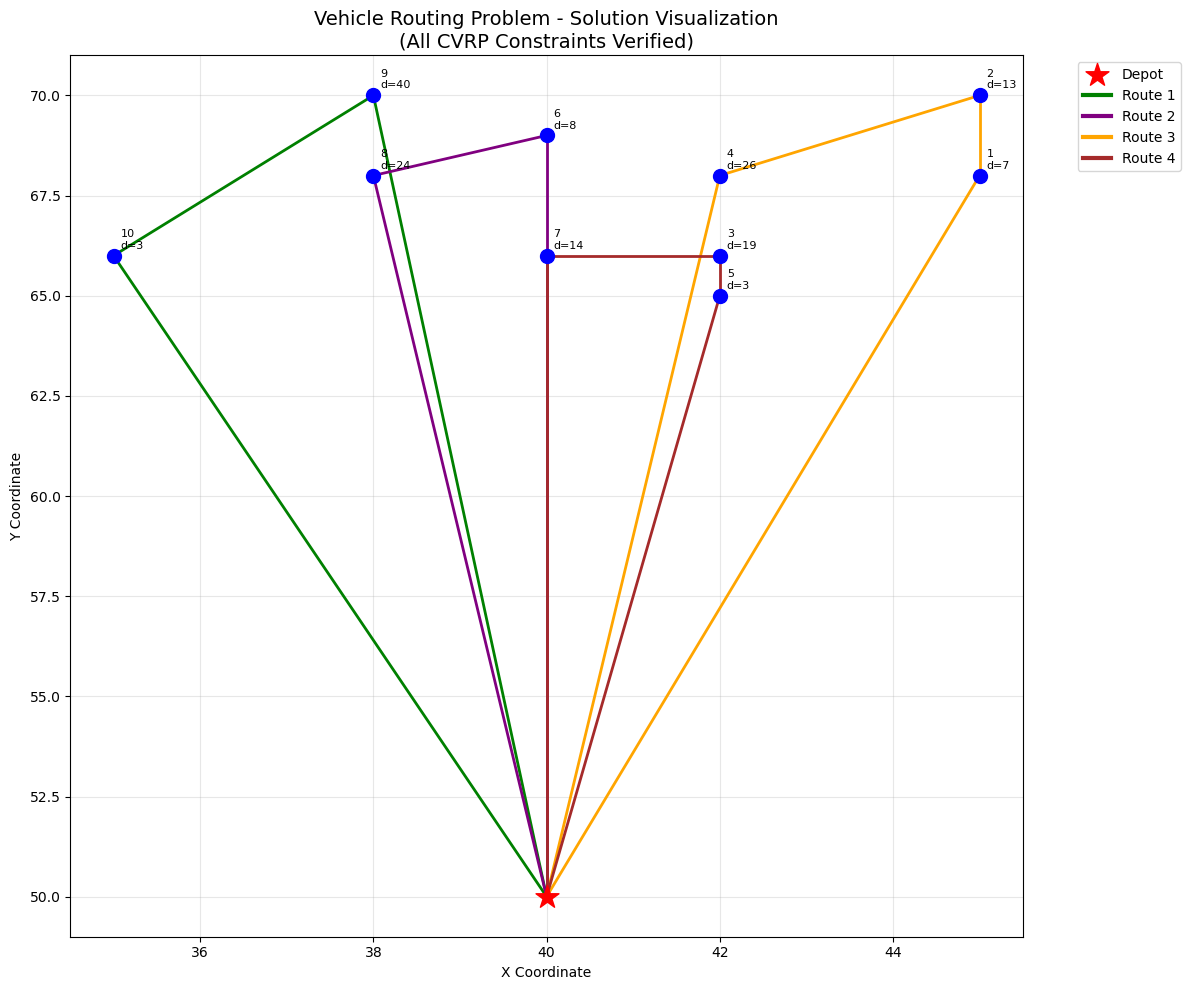

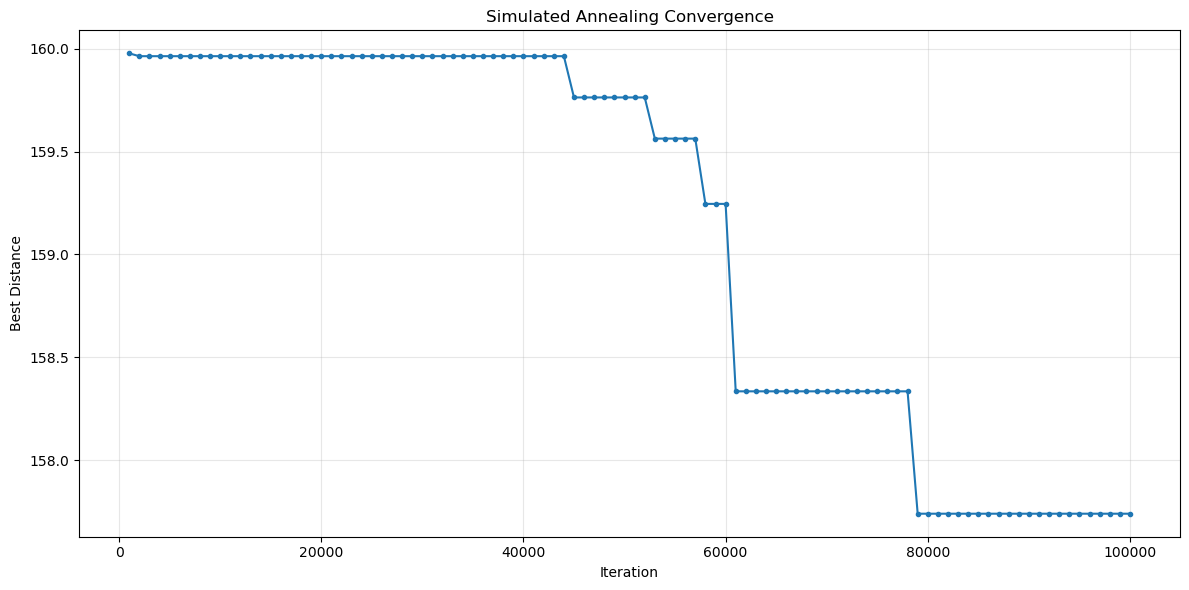

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import time
from typing import List, Tuple, Dict
import copy

# Load data
def load_data():
    vehicles_df = pd.read_csv("vehicles.csv")
    nodes_df = pd.read_csv("vrp_small.csv")
    
    print("Vehicles Data:")
    print(vehicles_df)
    print("\nNodes Data:")
    print(nodes_df)
    
    return vehicles_df, nodes_df

# Calculate Euclidean distance between two points
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Generate distance matrix
def generate_distance_matrix(nodes_df):
    num_nodes = len(nodes_df)
    distance_matrix = np.zeros((num_nodes, num_nodes))
    
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                distance_matrix[i, j] = calculate_distance(
                    nodes_df.loc[i, 'x'], nodes_df.loc[i, 'y'],
                    nodes_df.loc[j, 'x'], nodes_df.loc[j, 'y']
                )
    
    return distance_matrix

# Verify all CVRP constraints
    """
    Verify that a solution respects all CVRP constraints:
        1. Each customer is visited exactly once
        2. Vehicle capacity constraints are respected
        3. All routes start and end at depot
    """
def verify_cvrp_constraints(solution, vehicles_df, nodes_df):
    errors = []
    
    # Check 1: Each customer visited exactly once
    num_customers = len(nodes_df) - 1  # Exclude depot
    visited_customers = set()
    
    for route in solution:
        for customer in route:
            if customer == 0:  # Depot should not be in routes
                errors.append(f"Depot (node 0) found in route: {route}")
            elif customer in visited_customers:
                errors.append(f"Customer {customer} visited multiple times")
            else:
                visited_customers.add(customer)
    
    # Check if all customers are visited
    expected_customers = set(range(1, len(nodes_df)))
    missing_customers = expected_customers - visited_customers
    if missing_customers:
        errors.append(f"Customers not visited: {missing_customers}")
    
    # Check Vehicle capacity constraints
    vehicle_capacities = vehicles_df['capacity'].tolist()
    demands = nodes_df['demand'].tolist()
    
    if len(solution) > len(vehicle_capacities):
        errors.append(f"Too many routes ({len(solution)}) for available vehicles ({len(vehicle_capacities)})")
    
    for i, route in enumerate(solution):
        if i < len(vehicle_capacities):
            route_demand = sum(demands[node] for node in route)
            if route_demand > vehicle_capacities[i]:
                errors.append(f"Route {i+1} demand ({route_demand}) exceeds vehicle capacity ({vehicle_capacities[i]})")
    
    return errors

# Calculate total distance of a solution
def calculate_total_distance(solution, distance_matrix):
    total_distance = 0
    depot = 0  # Depot is at index 0
    
    for route in solution:
        if not route:  # Skip empty routes
            continue
        
        # Distance from depot to first customer
        total_distance += distance_matrix[depot, route[0]]
        
        # Distance between consecutive customers
        for i in range(len(route) - 1):
            total_distance += distance_matrix[route[i], route[i+1]]
        
        # Distance from last customer back to depot
        total_distance += distance_matrix[route[-1], depot]
    
    return total_distance

# Check if a solution is feasible (respects capacity constraints)
def is_feasible(solution, vehicles_df, nodes_df):
    vehicle_capacities = vehicles_df['capacity'].tolist()
    demands = nodes_df['demand'].tolist()
    
    if len(solution) > len(vehicle_capacities):
        return False  # More routes than available vehicles
    
    for i, route in enumerate(solution):
        route_demand = sum(demands[node] for node in route)
        if i < len(vehicle_capacities) and route_demand > vehicle_capacities[i]:
            return False  # Route exceeds vehicle capacity
    
    return True

# Generate an initial feasible solution using a greedy approach
def generate_initial_solution(nodes_df, vehicles_df):
    depot = 0  # Depot is at index 0
    num_nodes = len(nodes_df)
    num_vehicles = len(vehicles_df)
    
    # Get vehicle capacities
    vehicle_capacities = vehicles_df['capacity'].tolist()
    
    # List of all customers (excluding depot)
    customers = list(range(1, num_nodes))
    
    # Shuffle customers randomly
    random.shuffle(customers)
    
    # Initialize solution with empty routes for each vehicle
    solution = [[] for _ in range(num_vehicles)]
    remaining_capacity = vehicle_capacities.copy()
    
    # Assign customers to vehicles
    for customer in customers:
        demand = nodes_df.loc[customer, 'demand']
        assigned = False
        
        # Try to assign to existing vehicles
        for v in range(num_vehicles):
            if remaining_capacity[v] >= demand:
                solution[v].append(customer)
                remaining_capacity[v] -= demand
                assigned = True
                break
        
        # If can't assign, this is an infeasible problem
        if not assigned:
            print(f"WARNING: Cannot assign customer {customer} with demand {demand}")
            # Find vehicle with maximum remaining capacity and force assignment
            best_vehicle = max(range(num_vehicles), key=lambda v: remaining_capacity[v])
            solution[best_vehicle].append(customer)
            remaining_capacity[best_vehicle] -= demand
    
    # Remove empty routes
    solution = [route for route in solution if route]
    
    return solution

# Generate a neighbor solution with constraint preservation
def generate_neighbor(solution, nodes_df, vehicles_df):
      
    # Make a deep copy of the current solution
    new_solution = copy.deepcopy(solution)
    
    # Choose a random neighborhood operator
    operator = random.choice(['swap', 'relocate', 'two_opt'])
    
    if operator == 'swap':
        # Swap two randomly selected customers from different routes
        if len(new_solution) <= 1:
            return new_solution  # Not enough routes to swap
        
        # Find two routes with customers
        routes_with_customers = [i for i, route in enumerate(new_solution) if route]
        if len(routes_with_customers) < 2:
            return new_solution
        
        # Select two different routes
        route1_idx, route2_idx = random.sample(routes_with_customers, 2)
        
        # Select random positions in each route
        pos1 = random.randint(0, len(new_solution[route1_idx]) - 1)
        pos2 = random.randint(0, len(new_solution[route2_idx]) - 1)
        
        # Swap customers
        new_solution[route1_idx][pos1], new_solution[route2_idx][pos2] = \
            new_solution[route2_idx][pos2], new_solution[route1_idx][pos1]
    
    elif operator == 'relocate':
        # Move a customer from one route to another
        if len(new_solution) <= 1:
            return new_solution
        
        # Find routes with customers
        routes_with_customers = [i for i, route in enumerate(new_solution) if route]
        if not routes_with_customers:
            return new_solution
        
        # Select source route
        source_idx = random.choice(routes_with_customers)
        
        # If source route has only one customer, don't relocate if it would create empty route
        if len(new_solution[source_idx]) == 1 and len(routes_with_customers) == 1:
            return new_solution
        
        # Select destination route (can be existing or create new if vehicles available)
        possible_destinations = list(range(len(vehicles_df)))  # Can use any vehicle
        if source_idx in possible_destinations:
            possible_destinations.remove(source_idx)
        
        if not possible_destinations:
            return new_solution
        
        dest_idx = random.choice(possible_destinations)
        
        # Ensure destination route exists in solution
        while len(new_solution) <= dest_idx:
            new_solution.append([])
        
        # Select a random customer from source route
        pos_source = random.randint(0, len(new_solution[source_idx]) - 1)
        customer = new_solution[source_idx].pop(pos_source)
        
        # Insert customer into destination route
        pos_dest = random.randint(0, len(new_solution[dest_idx])) if new_solution[dest_idx] else 0
        new_solution[dest_idx].insert(pos_dest, customer)
        
        # Remove empty routes (but preserve customer assignments)
        new_solution = [route for route in new_solution if route]
    
    elif operator == 'two_opt':
        # Apply 2-opt move within a single route
        if not new_solution:
            return new_solution
        
        # Find routes with at least 2 customers
        eligible_routes = [i for i, route in enumerate(new_solution) if len(route) >= 2]
        if not eligible_routes:
            return new_solution
        
        # Select a random eligible route
        route_idx = random.choice(eligible_routes)
        
        # Select two random positions
        i = random.randint(0, len(new_solution[route_idx]) - 2)
        j = random.randint(i + 1, len(new_solution[route_idx]) - 1)
        
        # Reverse the segment between i and j
        new_solution[route_idx][i:j+1] = list(reversed(new_solution[route_idx][i:j+1]))
    
    return new_solution

# Simulated Annealing algorithm with constraint verification
def simulated_annealing(nodes_df, vehicles_df, distance_matrix, initial_temp=10, cooling_rate=0.99999, min_temp=1, max_iterations=100000):
    # Generate initial solution
    current_solution = generate_initial_solution(nodes_df, vehicles_df)
    
    # Verify initial solution
    initial_errors = verify_cvrp_constraints(current_solution, vehicles_df, nodes_df)
    if initial_errors:
        print("WARNING: Initial solution has constraint violations:")
        for error in initial_errors:
            print(f"  - {error}")
    
    current_distance = calculate_total_distance(current_solution, distance_matrix)
    
    best_solution = copy.deepcopy(current_solution)
    best_distance = current_distance
    
    # Initialize temperature
    temperature = initial_temp
    
    # For plotting convergence
    iteration_list = []
    distance_list = []
    
    # Statistics
    total_neighbors_generated = 0
    feasible_neighbors = 0
    accepted_moves = 0
    
    # Main SA loop
    iteration = 0
    while temperature > min_temp and iteration < max_iterations:
        # Generate neighbor solution
        neighbor_solution = generate_neighbor(current_solution, nodes_df, vehicles_df)
        total_neighbors_generated += 1
        
        # Verify neighbor solution constraints
        neighbor_errors = verify_cvrp_constraints(neighbor_solution, vehicles_df, nodes_df)
        
        # Check if neighbor is feasible
        if not neighbor_errors and is_feasible(neighbor_solution, vehicles_df, nodes_df):
            feasible_neighbors += 1
            neighbor_distance = calculate_total_distance(neighbor_solution, distance_matrix)
            
            # Calculate acceptance probability
            delta = neighbor_distance - current_distance
            acceptance_probability = math.exp(-delta / temperature) if delta > 0 else 1.0
            
            # Accept neighbor solution with probability
            if random.random() < acceptance_probability:
                current_solution = neighbor_solution
                current_distance = neighbor_distance
                accepted_moves += 1
                
                # Update best solution if better
                if current_distance < best_distance:
                    best_solution = copy.deepcopy(current_solution)
                    best_distance = current_distance
        
        # Cool down temperature
        temperature *= cooling_rate
        iteration += 1
        
        # Store data for plotting
        if iteration % 1000 == 0:
            iteration_list.append(iteration)
            distance_list.append(best_distance)
            feasibility_rate = (feasible_neighbors / total_neighbors_generated) * 100
            acceptance_rate = (accepted_moves / total_neighbors_generated) * 100
            print(f"Iteration {iteration}, Best Distance: {best_distance:.2f}, "
                  f"Temperature: {temperature:.4f}, Feasibility: {feasibility_rate:.1f}%, "
                  f"Acceptance: {acceptance_rate:.1f}%")
    
    print(f"\nSimulated Annealing completed after {iteration} iterations")
    print(f"Best solution found with distance: {best_distance:.2f}")

    # Final constraint verification
    final_errors = verify_cvrp_constraints(best_solution, vehicles_df, nodes_df)
    if final_errors:
        print("\nWARNING: Final solution has constraint violations:")
        for error in final_errors:
            print(f"  - {error}")
    else:
        print("\n Final solution satisfies all CVRP constraints!")
    
    return best_solution, best_distance, (iteration_list, distance_list)

# Visualize the solution
def visualize_solution(solution, nodes_df):
    plt.figure(figsize=(12, 10))
    
    # Plot nodes
    depot_x, depot_y = nodes_df.loc[0, 'x'], nodes_df.loc[0, 'y']
    plt.scatter(depot_x, depot_y, c='red', s=300, marker='*', label='Depot', zorder=5)
    
    for i in range(1, len(nodes_df)):
        plt.scatter(nodes_df.loc[i, 'x'], nodes_df.loc[i, 'y'], c='blue', s=100, zorder=3)
        plt.annotate(f"{i}\nd={nodes_df.loc[i, 'demand']}", 
                    (nodes_df.loc[i, 'x'], nodes_df.loc[i, 'y']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    # Plot routes with different colors
    colors = ['green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']
    
    for i, route in enumerate(solution):
        color = colors[i % len(colors)]
        
        # Connect depot to first customer
        if route:
            first_customer = route[0]
            plt.plot([depot_x, nodes_df.loc[first_customer, 'x']], 
                     [depot_y, nodes_df.loc[first_customer, 'y']], 
                     c=color, linewidth=2, zorder=2)
            
            # Connect customers in the route
            for j in range(len(route) - 1):
                customer1, customer2 = route[j], route[j+1]
                plt.plot([nodes_df.loc[customer1, 'x'], nodes_df.loc[customer2, 'x']], 
                         [nodes_df.loc[customer1, 'y'], nodes_df.loc[customer2, 'y']], 
                         c=color, linewidth=2, zorder=2)
            
            # Connect last customer back to depot
            last_customer = route[-1]
            plt.plot([nodes_df.loc[last_customer, 'x'], depot_x], 
                     [nodes_df.loc[last_customer, 'y'], depot_y], 
                     c=color, linewidth=2, zorder=2)
            
            # Add route label
            plt.plot([], [], c=color, linewidth=3, label=f"Route {i+1}")
    
    plt.title("Vehicle Routing Problem - Solution Visualization\n(All CVRP Constraints Verified)", fontsize=14)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Function to print detailed solution information
def print_solution_details(solution, nodes_df, vehicles_df, distance_matrix):
    print("\n===== Solution Details =====")
    total_distance = calculate_total_distance(solution, distance_matrix)
    print(f"Total Distance: {total_distance:.2f}")
    print(f"Number of Routes: {len(solution)}")
    print(f"Number of Vehicles Used: {len(solution)} / {len(vehicles_df)}")
    
    total_demand_served = 0
    
    for i, route in enumerate(solution):
        route_distance = 0
        route_demand = 0
        depot = 0
        
        # Calculate route statistics
        if route:
            # Distance from depot to first customer
            route_distance += distance_matrix[depot, route[0]]
            
            # Distance between consecutive customers
            for j in range(len(route) - 1):
                route_distance += distance_matrix[route[j], route[j+1]]
            
            # Distance from last customer back to depot
            route_distance += distance_matrix[route[-1], depot]
            
            # Calculate total demand on route
            route_demand = sum(nodes_df.loc[node, 'demand'] for node in route)
            total_demand_served += route_demand
        
        # Print route information
        vehicle_capacity = vehicles_df.loc[i, 'capacity'] if i < len(vehicles_df) else "N/A"
        print(f"\nRoute {i+1}:")
        print(f"  Vehicle: V{i+1} (Capacity: {vehicle_capacity})")
        print(f"  Path: Depot -> {' -> '.join(map(str, route))} -> Depot")
        print(f"  Customers: {len(route)}")
        print(f"  Total Demand: {route_demand}")
        print(f"  Route Distance: {route_distance:.2f}")
        if vehicle_capacity != "N/A":
            utilization = (route_demand/float(vehicle_capacity)*100)
            print(f" Vehicle Utilization: {utilization:.1f}%")
            if route_demand > vehicle_capacity:
                print(f"CAPACITY VIOLATION!")
        else:
            print(f"  Vehicle Utilization: N/A")
    
    # Summary statistics
    expected_total_demand = sum(nodes_df['demand'][1:])  # Exclude depot
    print(f"\n===== Summary =====")
    print(f"Total Demand Expected: {expected_total_demand}")
    print(f"Total Demand Served: {total_demand_served}")
    print(f"Demand Coverage: {(total_demand_served/expected_total_demand)*100:.1f}%")

# Main function
def main():
    # Load data
    vehicles_df, nodes_df = load_data()
    
    # Generate distance matrix
    distance_matrix = generate_distance_matrix(nodes_df)
    
    # Print some information about the problem
    print("\n===== Problem Information =====")
    print(f"Number of Vehicles: {len(vehicles_df)}")
    print(f"Vehicle Capacities: {vehicles_df['capacity'].tolist()}")
    print(f"Number of Nodes (including depot): {len(nodes_df)}")
    print(f"Number of Customers: {len(nodes_df) - 1}")
    print(f"Total Customer Demand: {sum(nodes_df['demand'][1:])}")
    print(f"Total Vehicle Capacity: {sum(vehicles_df['capacity'])}")
    
    # Check if problem is feasible
    total_demand = sum(nodes_df['demand'][1:])
    total_capacity = sum(vehicles_df['capacity'])
    if total_demand > total_capacity:
        print(f"WARNING: Total demand ({total_demand}) exceeds total capacity ({total_capacity})")
    else:
        print(f"The Problem is feasible: Total capacity ({total_capacity}) >= Total demand ({total_demand})")
    
    # Set random seed for reproducibility
    random.seed(42)
    
    # Run Simulated Annealing
    print("\n===== Running Simulated Annealing =====")
    start_time = time.time()
    best_solution, best_distance, convergence_data = simulated_annealing(
        nodes_df, vehicles_df, distance_matrix,
        initial_temp=10, cooling_rate=0.99999, min_temp=1, max_iterations=100000
    )
    end_time = time.time()
    
    print(f"\nExecution Time: {end_time - start_time:.2f} seconds")
    
    # Print solution details
    print_solution_details(best_solution, nodes_df, vehicles_df, distance_matrix)
    
    # Final constraint verification
    print("\n===== Final Constraint Verification =====")
    errors = verify_cvrp_constraints(best_solution, vehicles_df, nodes_df)
    if errors:
        print(" NO CONSTRAINT VIOLATIONS FOUND:")
        for error in errors:
            print(f"  - {error}")
    else:
        print("  All CVRP constraints satisfied!")
        print("  ✓ Each customer visited exactly once")
        print("  ✓ Vehicle capacity constraints respected")
        print("  ✓ All routes start and end at depot")
    
    # Visualize the solution
    visualize_solution(best_solution, nodes_df)
    
    # Plot convergence
    iterations, distances = convergence_data
    plt.figure(figsize=(12, 6))
    plt.plot(iterations, distances, '-o', markersize=3)
    plt.title('Simulated Annealing Convergence')
    plt.xlabel('Iteration')
    plt.ylabel('Best Distance')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()